This section of the code does initial eda on the scraped data.

In [1]:
from bs4 import BeautifulSoup
import requests
import time, os
import seaborn as sns
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

Read in saved data file.  best_final represents the most complete dataset from scraping.  best_final(x) included small data cleaning edits based on DC Property Record data.

In [2]:
property_df = pd.read_csv('best_final.csv')

In [3]:
property_df

,Structure Type,Architectural Style,New Construction,Year Built,Fireplaces Count,Levels Count,Total SqFt,Living Area SqFt,Above Grade Finished SqFt,State,...,Historic,Basement Type,Garage Spaces,Total Garage And Parking Spaces,Tax Total Finished SqFt,Zip Code Plus4,Year Major Renovation Remodel,Street Direction Suffix,Price,Status
0,Detached,Colonial,No,1923.0,2,2.0,2544.0,1596.0,1596.0,DC,...,No,NaN,0,4,1596.0,1765.0,NaN,NE,1300000,For Sale
1,Interior Row/Townhouse,Dwelling W/Separate Living Area,No,1920.0,0,3.0,2193.0,2193.0,1394.0,DC,...,NaN,"Fully Finished, Front Entrance, Rear Entrance,...",0,2,1859.0,3531.0,NaN,NaN,1190000,Sold
2,Interior Row/Townhouse,Federal,No,1910.0,0,2.0,1168.0,1168.0,1168.0,DC,...,NaN,NaN,0,1,1168.0,2417.0,NaN,NaN,755000,Sold
3,Twin/Semi-Detached,Traditional,No,1929.0,1,3.0,2172.0,1835.0,1398.0,DC,...,No,"Connecting Stairway, Full, Improved, Interior ...",0,2,1835.0,2131.0,NaN,NaN,750000,Sold
4,Interior Row/Townhouse,Victorian,No,1909.0,0,3.0,2092.0,2092.0,2092.0,DC,...,NaN,English,2,2,1984.0,1413.0,NaN,NaN,1199000,Contingent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,2375000,Contract
1014,Detached,Ranch/Rambler,No,1965.0,0,2.0,1850.0,1850.0,1850.0,VA,...,NaN,Walkout Level,0,0,1000.0,1909.0,NaN,N,805000,Sold
1015,Detached,Contemporary,No,2018.0,4,2.0,6340.0,6340.0,6340.0,VA,...,NaN,NaN,4,4,6340.0,1837.0,NaN,NaN,6250000,For Sale
1016,Detached,Contemporary,No,2019.0,1,3.0,10744.0,10744.0,6266.0,VA,...,NaN,"Full, Fully Finished, Walkout Level",5,5,5758.0,1813.0,NaN,NaN,7000000,Sold


In [4]:
property_df['Price'] = property_df['Price'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Structure Type                   952 non-null    object 
 1   Architectural Style              923 non-null    object 
 2   New Construction                 960 non-null    object 
 3   Year Built                       960 non-null    float64
 4   Fireplaces Count                 1018 non-null   int64  
 5   Levels Count                     959 non-null    float64
 6   Total SqFt                       957 non-null    float64
 7   Living Area SqFt                 956 non-null    float64
 8   Above Grade Finished SqFt        956 non-null    float64
 9   State                            960 non-null    object 
 10  Street Number Modifier           959 non-null    object 
 11  Bedrooms                         954 non-null    float64
 12  Bathrooms Total     

In [5]:
property_df.describe()

,Year Built,Fireplaces Count,Levels Count,Total SqFt,Living Area SqFt,Above Grade Finished SqFt,Bedrooms,Bathrooms Total,Improvement Assessed Value,Land Assessed Value,...,Tax Assessed Value,Tax Year,Latitude,Zip Code,Garage Spaces,Total Garage And Parking Spaces,Tax Total Finished SqFt,Zip Code Plus4,Year Major Renovation Remodel,Price
count,960.000000,1018.000000,959.000000,957.000000,956.000000,956.000000,954.000000,954.000000,8.910000e+02,9.040000e+02,...,9.450000e+02,960.000000,960.000000,960.000000,1018.000000,1018.000000,757.000000,907.000000,165.000000,1.006000e+03
mean,1941.414583,1.055010,3.116788,3210.771160,2965.904812,2362.219665,4.070231,3.431866,4.999044e+05,5.704630e+05,...,1.065783e+06,2020.165625,38.939130,20446.475000,0.635560,1.367387,2463.712021,3431.158765,2014.400000,1.469042e+06
std,36.162664,1.166949,0.683018,1807.053045,1700.871747,1342.476798,1.258880,1.386326,4.823554e+05,2.456676e+05,...,6.584150e+05,3.697174,0.029108,716.765479,0.887913,1.526108,1299.078425,1706.270268,9.074757,1.071387e+06
min,1800.000000,0.000000,1.000000,549.000000,549.000000,549.000000,1.000000,1.000000,5.550000e+04,3.371000e+04,...,1.000000e+00,1995.000000,38.886960,20001.000000,0.000000,0.000000,648.000000,1002.000000,1957.000000,0.000000e+00
25%,1917.000000,0.000000,3.000000,2020.000000,1844.000000,1457.000000,3.000000,2.500000,2.203000e+05,4.075350e+05,...,6.739000e+05,2020.000000,38.914255,20008.000000,0.000000,0.000000,1632.000000,2031.500000,2012.000000,8.892250e+05
50%,1934.000000,1.000000,3.000000,2700.000000,2489.500000,1966.500000,4.000000,3.500000,3.684300e+05,5.397850e+05,...,9.217670e+05,2020.000000,38.940885,20015.000000,0.000000,1.000000,2139.000000,3150.000000,2017.000000,1.200000e+06
75%,1955.000000,2.000000,4.000000,3830.000000,3486.750000,2821.750000,5.000000,4.000000,6.007300e+05,7.009750e+05,...,1.243500e+06,2021.000000,38.964368,20815.000000,1.000000,2.000000,2954.000000,4564.000000,2021.000000,1.695000e+06
max,2022.000000,12.000000,5.000000,16200.000000,13397.000000,12200.000000,9.000000,10.000000,6.713420e+06,2.203800e+06,...,8.028790e+06,2121.000000,38.988740,22209.000000,6.000000,9.000000,14124.000000,8184.000000,2021.000000,1.195000e+07


In [6]:
property_df_n1 = property_df[['Year Assessed', 'Longitude', 'Parcel Id', 'Tax Annual Amount', 'Tax Assessed Value', 'Latitude', 'Price']]
property_df_n2 = property_df[['Year Built', 'Fireplaces Count', 'Levels Count', 'Total SqFt', 'Living Area SqFt', 'Above Grade Finished SqFt', 'Price']]
property_df_n3 = property_df[['Zip Code', 'Garage Spaces', 'Total Garage And Parking Spaces', 'Tax Total Finished SqFt', 'Zip Code Plus4', 'Price']]
property_df_n4 = property_df[['Bedrooms', 'Bathrooms Total', 'Improvement Assessed Value', 'Land Assessed Value', 'Lot SqFt', 'Price']]

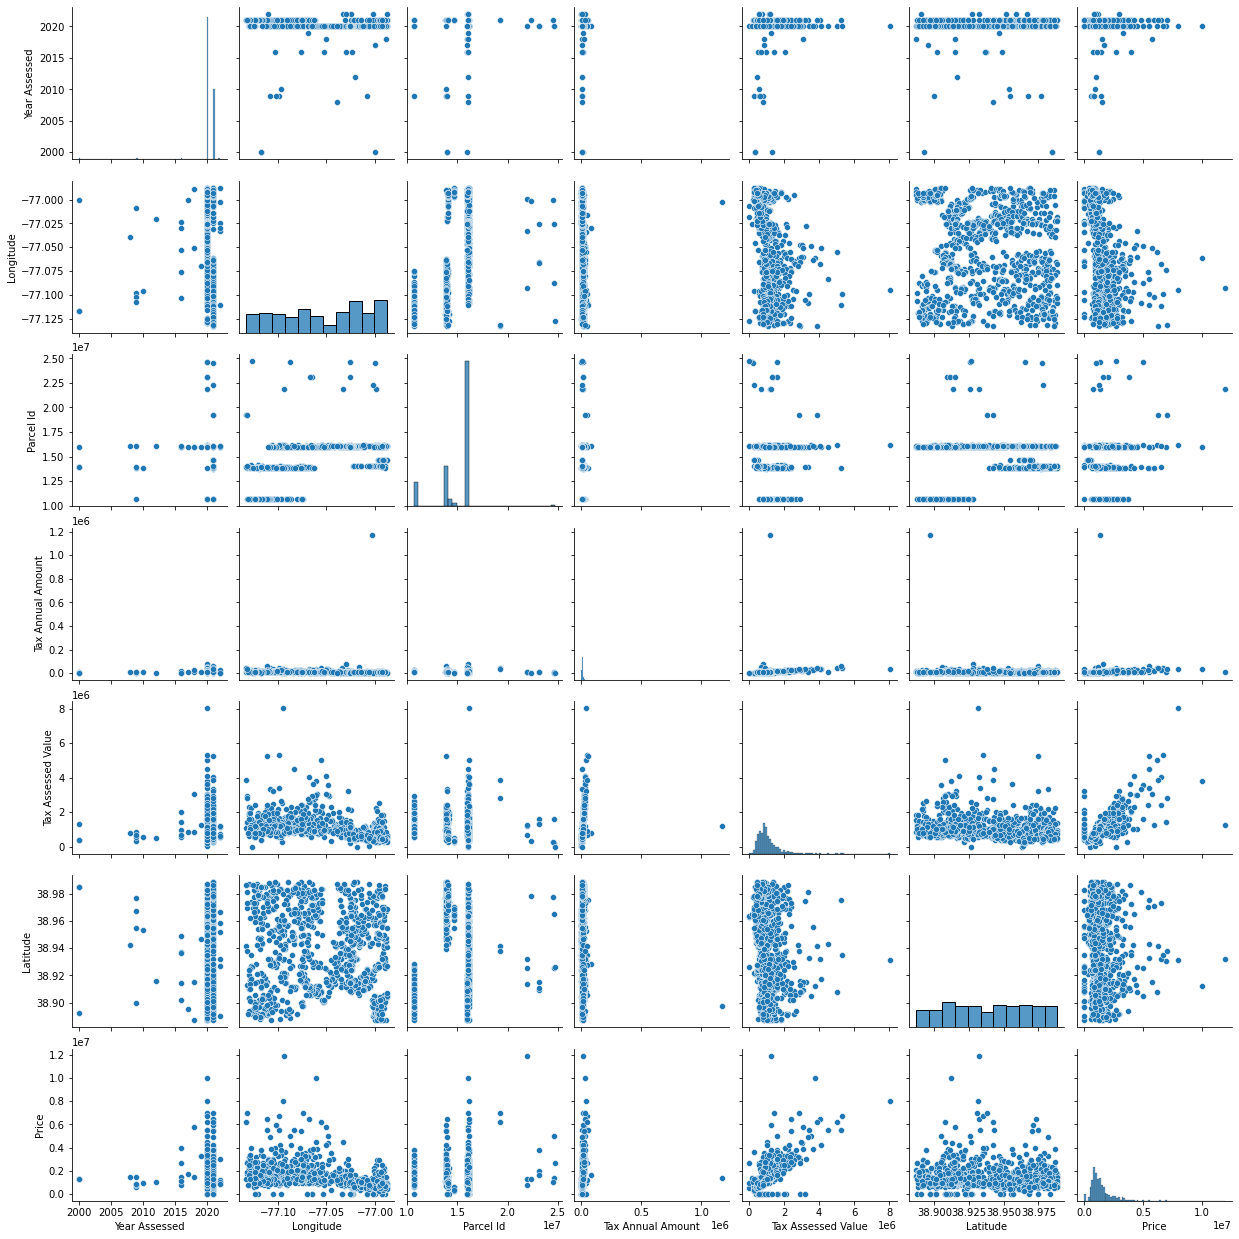

In [7]:
sns.pairplot(property_df_n1)

Price Correlation: Year Assessed, Long, Tax Assessed Value, Lat?
Cross Corr: 

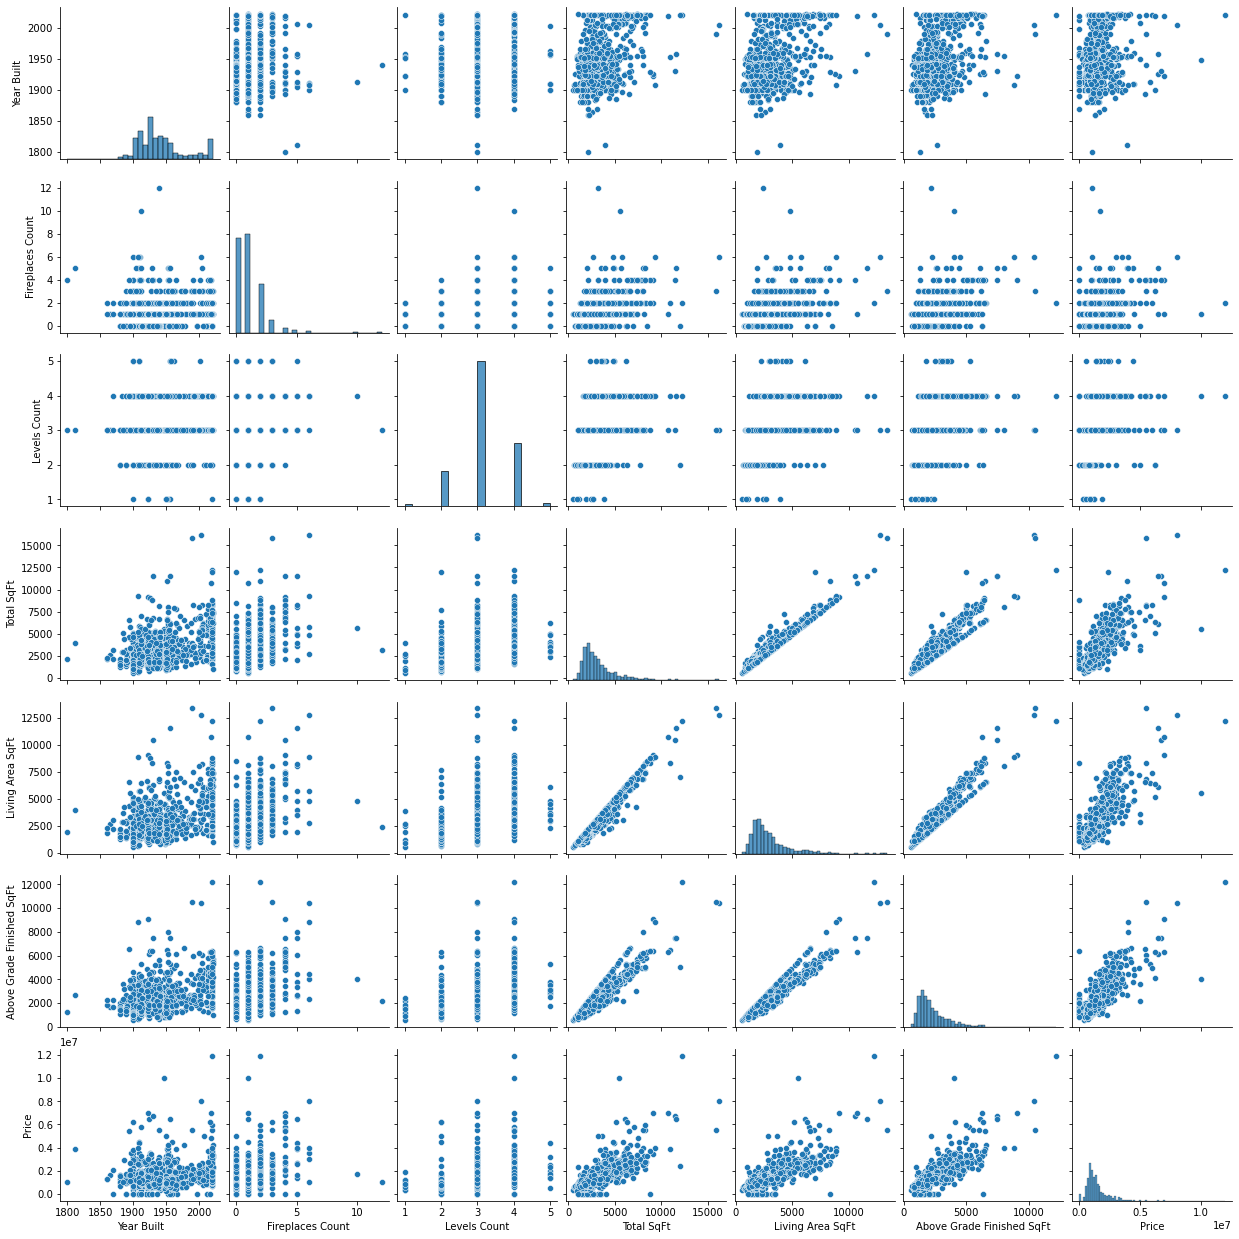

In [8]:
sns.pairplot(property_df_n2)

Price Correlation: Year Built, Fireplaces, Levels Count, Total/Living Area/Above Grade Fin SQFT
Collinear: Total/Living Area/Above Grade Fin SQFT - pick one

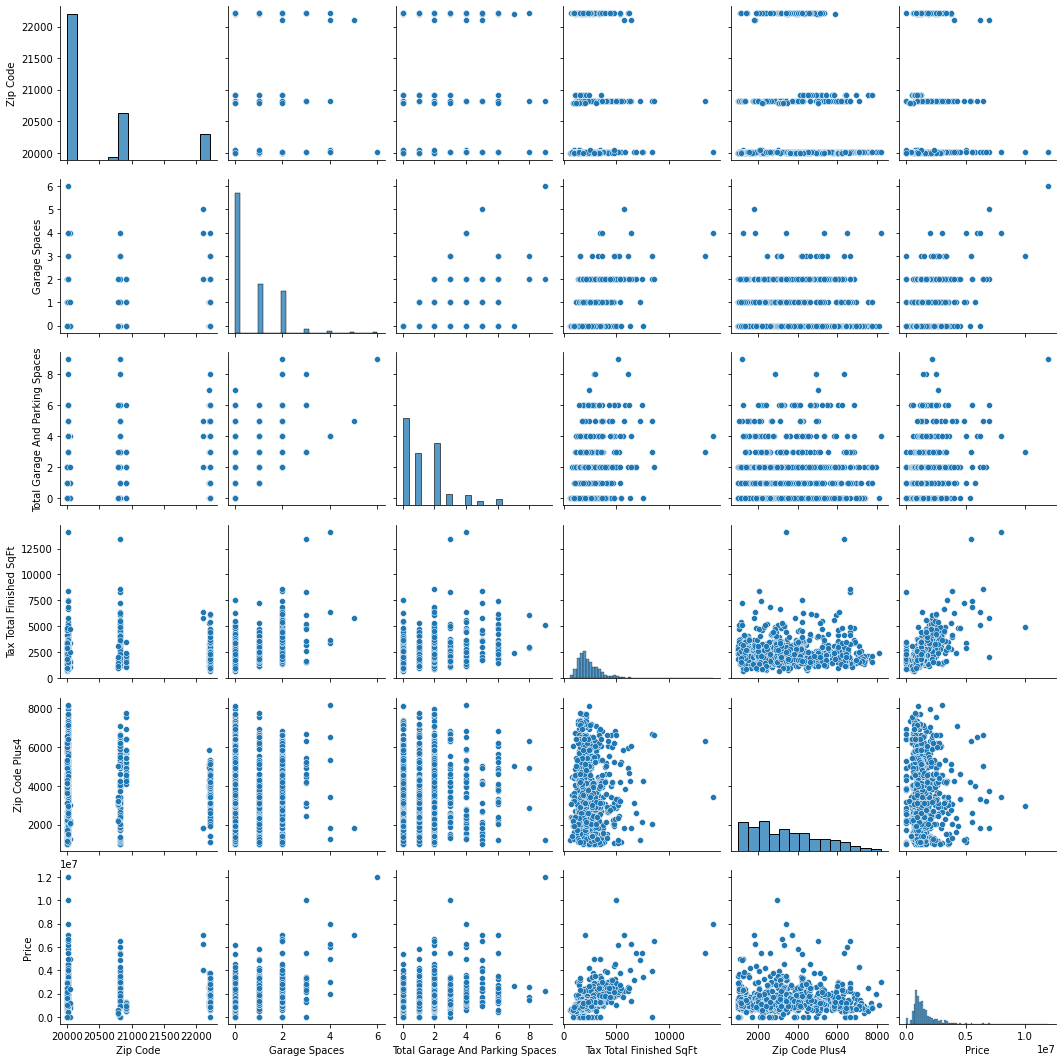

In [9]:
sns.pairplot(property_df_n3)

Price Correlation: Garage / Total Garage and Parking Spaces, Tax Total Finished SQFT
Cross Corr: Garage / Total Garage and Parking Spaces,  - pick one

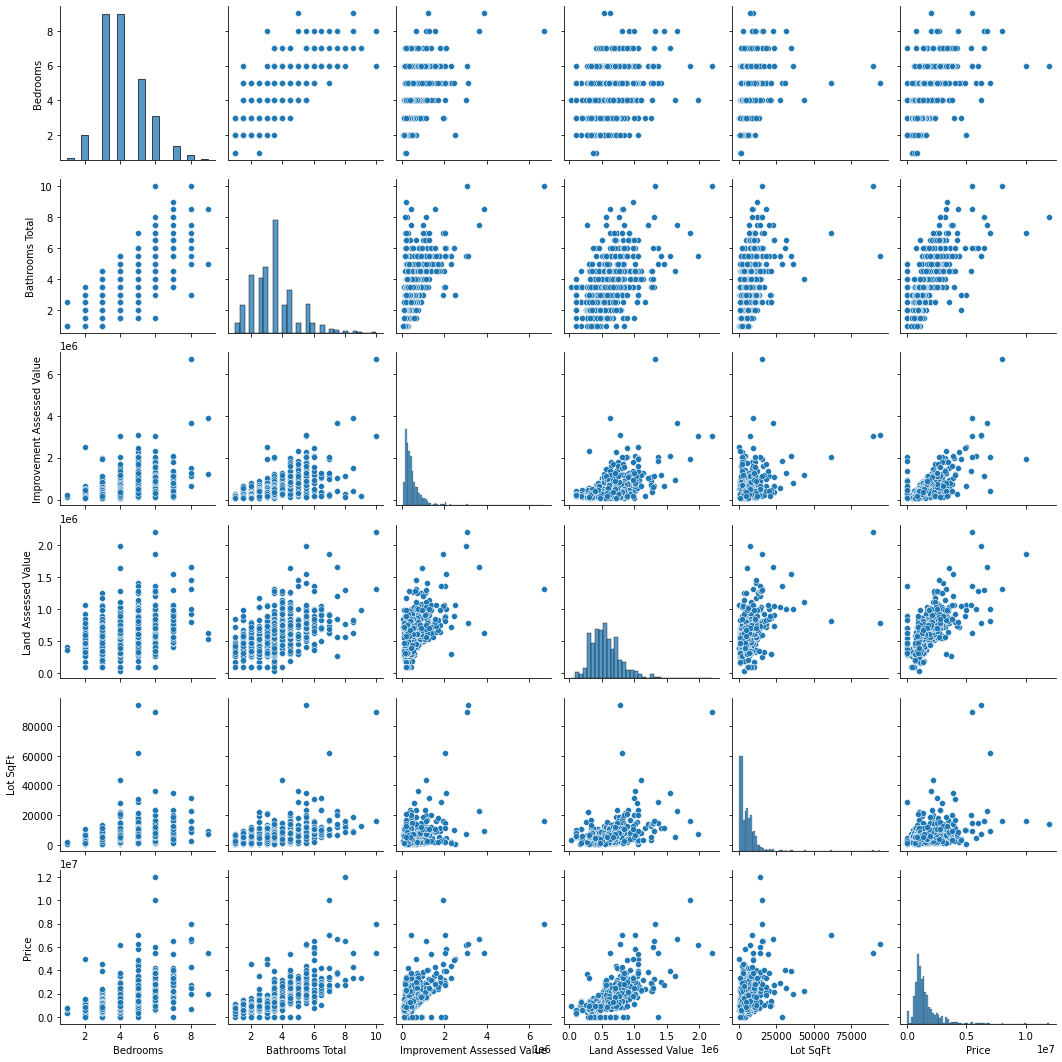

In [10]:
sns.pairplot(property_df_n4)

Price Correlation: Bedrooms, Bathrooms, Improvement Assessed, Land Assessed, Lot SqFt
Cross Corr: All

Starting Features

In [11]:
property_df_n = property_df[['Year Assessed', 'Longitude', 'Tax Assessed Value', 'Latitude', 'Year Built', 'Fireplaces Count', 'Levels Count', 'Total SqFt',  'Garage Spaces', 'Tax Total Finished SqFt',  'Bedrooms', 'Bathrooms Total', 'Improvement Assessed Value', 'Land Assessed Value', 'Lot SqFt', 'Price', 'Status']]

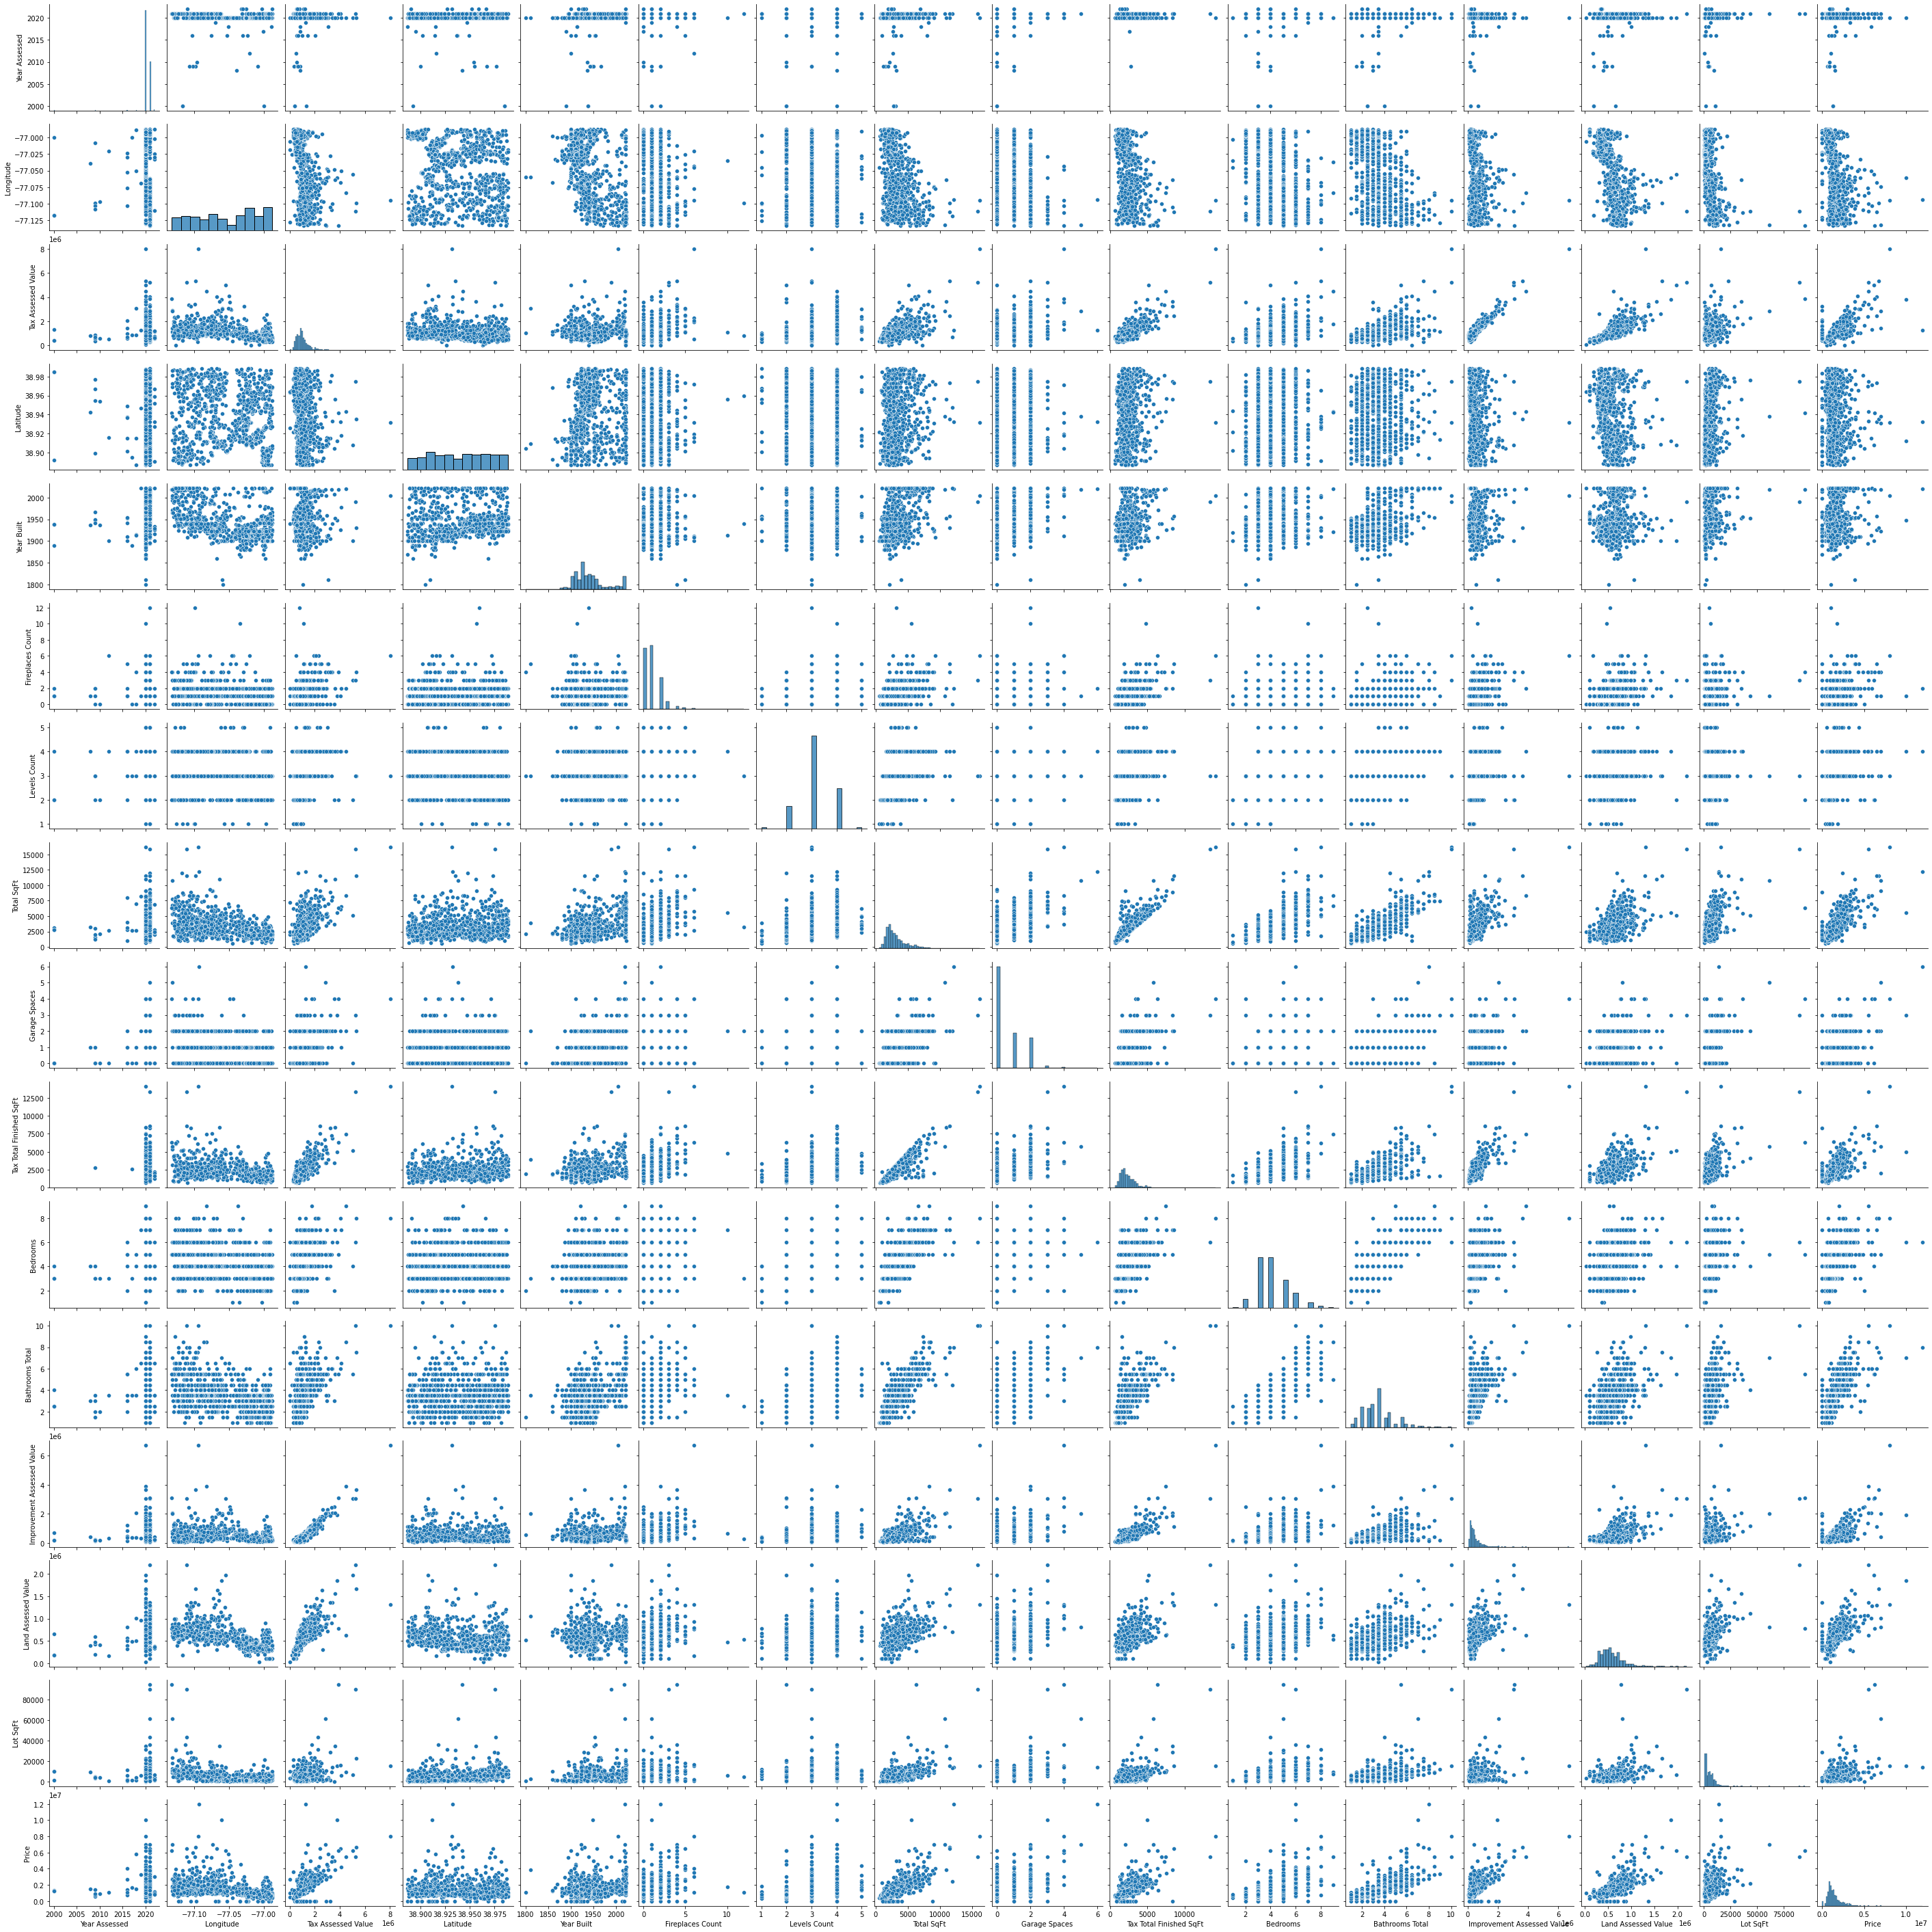

In [12]:
sns.pairplot(property_df_n)

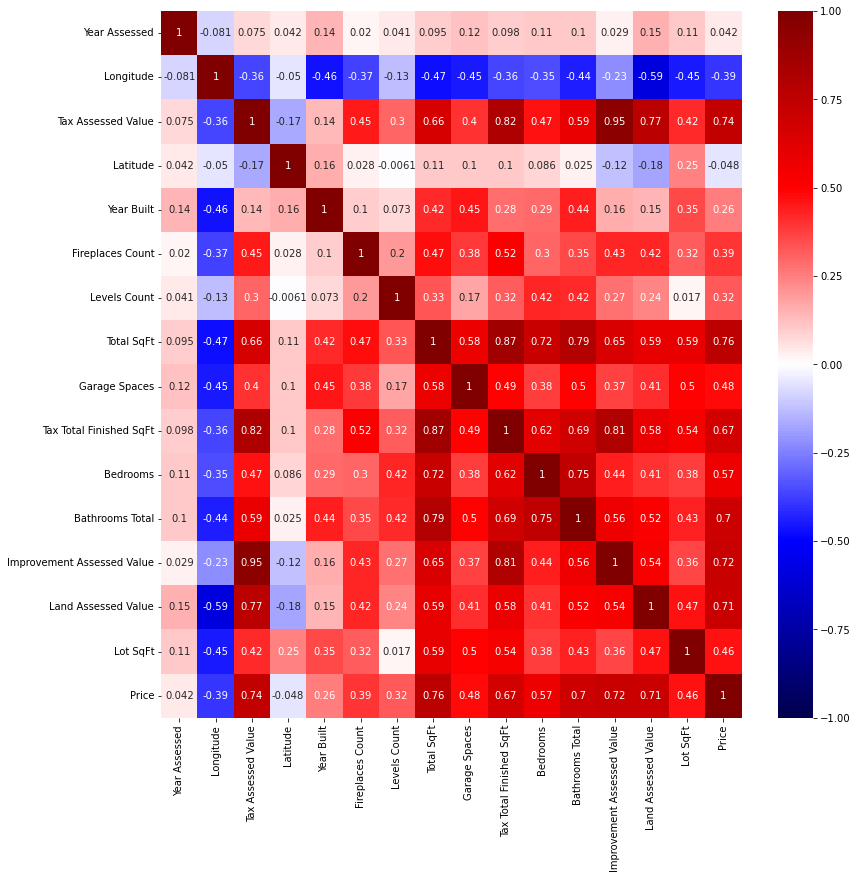

In [13]:
fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(property_df_n.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Let's try a LASSO model to see key contributors.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.linear_model import lars_path

In [15]:
property_df_nv = property_df_n.loc[property_df_n['Status'].str.contains('Contract|Contingent', case=False)]
property_df_nte = property_df_n.loc[property_df_n['Status'].str.contains('For Sale', case=False)]
property_df_ntr = property_df_n.loc[property_df_n['Status'].str.contains('Sold|OFF MARKET', case=False)]
print(property_df_ntr.info(),property_df_nv.info(),property_df_nte.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 1 to 1016
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year Assessed               410 non-null    float64
 1   Longitude                   424 non-null    float64
 2   Tax Assessed Value          419 non-null    float64
 3   Latitude                    424 non-null    float64
 4   Year Built                  424 non-null    float64
 5   Fireplaces Count            443 non-null    int64  
 6   Levels Count                424 non-null    float64
 7   Total SqFt                  423 non-null    float64
 8   Garage Spaces               443 non-null    int64  
 9   Tax Total Finished SqFt     360 non-null    float64
 10  Bedrooms                    423 non-null    float64
 11  Bathrooms Total             423 non-null    float64
 12  Improvement Assessed Value  399 non-null    float64
 13  Land Assessed Value         400 no

In [16]:
property_df_ntr.dropna(inplace=True) # drop nulls for this quick check
property_df_ntr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 1 to 1016
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year Assessed               354 non-null    float64
 1   Longitude                   354 non-null    float64
 2   Tax Assessed Value          354 non-null    float64
 3   Latitude                    354 non-null    float64
 4   Year Built                  354 non-null    float64
 5   Fireplaces Count            354 non-null    int64  
 6   Levels Count                354 non-null    float64
 7   Total SqFt                  354 non-null    float64
 8   Garage Spaces               354 non-null    int64  
 9   Tax Total Finished SqFt     354 non-null    float64
 10  Bedrooms                    354 non-null    float64
 11  Bathrooms Total             354 non-null    float64
 12  Improvement Assessed Value  354 non-null    float64
 13  Land Assessed Value         354 no

/Applications/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
X_tr = property_df_ntr.iloc[:,0:15]
X_v = property_df_nv.iloc[:,0:15]
X_te = property_df_nte.iloc[:,0:15]
y_tr = property_df_ntr.iloc[:,15]
y_v = property_df_nv.iloc[:,15]
y_te = property_df_nte.iloc[:,15]
y_tr.head(5)

1     1190000.0
2      755000.0
3      750000.0
7      875000.0
11     915000.0
Name: Price, dtype: float64

In [18]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set


std = StandardScaler()
std.fit(X_tr.values)

StandardScaler()

In [19]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_trs = std.transform(X_tr.values)

/Applications/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

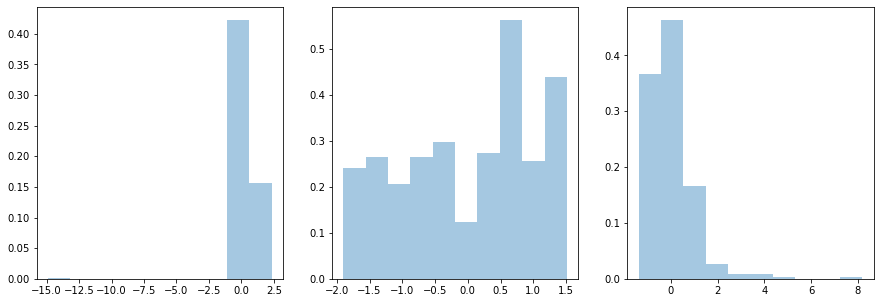

In [20]:
## Here we can plot histograms of a few transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(X_trs[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
sns.distplot(X_trs[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
sns.distplot(X_trs[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)


In [21]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_trs,y_tr)

Lasso(alpha=10000)

In [22]:
# These are the (standardized) coefficients found
# when it refit using that best alpha

list(zip(X_tr.columns, lasso_model.coef_))

[('Year Assessed', -27651.469459151744),
 ('Longitude', 35491.85136746997),
 ('Tax Assessed Value', 527919.2845511624),
 ('Latitude', 16776.25214565973),
 ('Year Built', -20005.385230477936),
 ('Fireplaces Count', -4099.836448433898),
 ('Levels Count', 29125.176612542557),
 ('Total SqFt', 110131.3936271212),
 ('Garage Spaces', 22735.875170783238),
 ('Tax Total Finished SqFt', -107416.14461935412),
 ('Bedrooms', -0.0),
 ('Bathrooms Total', 81061.54184407416),
 ('Improvement Assessed Value', 30869.59542792635),
 ('Land Assessed Value', 0.0),
 ('Lot SqFt', 127512.9344762715)]

In [23]:
print("Computing regularization path using the LARS ...")

Computing regularization path using the LARS ...


In [24]:
alphas, _, coefs = lars_path(X_trs, y_tr.values, method='lasso')

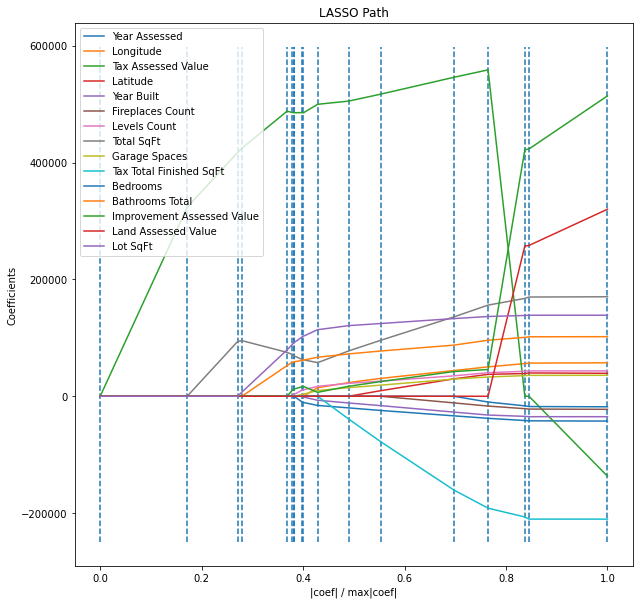

In [25]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_tr.columns)
plt.show()


Remove assessed values so they can later be used for value.

In [26]:
X_trna = X_tr[['Longitude', 'Latitude', 'Year Built', 'Fireplaces Count', 'Levels Count', 'Total SqFt', 'Garage Spaces', 'Tax Total Finished SqFt', 'Bedrooms', 'Bathrooms Total', 'Lot SqFt']]
X_trna

,Longitude,Latitude,Year Built,Fireplaces Count,Levels Count,Total SqFt,Garage Spaces,Tax Total Finished SqFt,Bedrooms,Bathrooms Total,Lot SqFt
1,-77.00035,38.90308,1920.0,0,3.0,2193.0,0,1859.0,4.0,3.5,1697.0
2,-77.02684,38.92995,1910.0,0,2.0,1168.0,0,1168.0,3.0,1.5,1247.0
3,-76.99143,38.94141,1929.0,1,3.0,2172.0,0,1835.0,3.0,2.0,2645.0
7,-76.99155,38.93637,2015.0,0,3.0,1920.0,1,1628.0,3.0,3.5,1620.0
11,-77.02651,38.92403,1910.0,0,3.0,1696.0,0,1612.0,3.0,3.5,1357.0
...,...,...,...,...,...,...,...,...,...,...,...
1005,-77.12491,38.90044,1976.0,2,3.0,2622.0,0,2622.0,4.0,3.5,4455.0
1006,-77.12417,38.89889,1993.0,1,4.0,3632.0,1,2532.0,5.0,3.5,7447.0
1009,-77.13016,38.90370,1988.0,2,3.0,6173.0,2,4414.0,6.0,5.5,11788.0
1014,-77.13075,38.89190,1965.0,0,2.0,1850.0,0,1000.0,3.0,3.0,5000.0


In [27]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set


std = StandardScaler()
std.fit(X_trna.values)

StandardScaler()

In [28]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_trnas = std.transform(X_trna.values)

In [29]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_trnas,y_tr)

Lasso(alpha=10000)

In [30]:
# These are the (standardized) coefficients found
# when it refit using that best alpha

list(zip(X_trna.columns, lasso_model.coef_))

[('Longitude', -23147.13618375322),
 ('Latitude', -122080.01372209442),
 ('Year Built', -103228.62782399093),
 ('Fireplaces Count', 32801.148749061525),
 ('Levels Count', 30697.632062678218),
 ('Total SqFt', 234015.23818997358),
 ('Garage Spaces', 40270.57126565685),
 ('Tax Total Finished SqFt', 166789.395221864),
 ('Bedrooms', -115898.36818454154),
 ('Bathrooms Total', 195936.01580006108),
 ('Lot SqFt', 113414.01336846426)]

In [31]:
alphas, _, coefs = lars_path(X_trnas, y_tr.values, method='lasso')

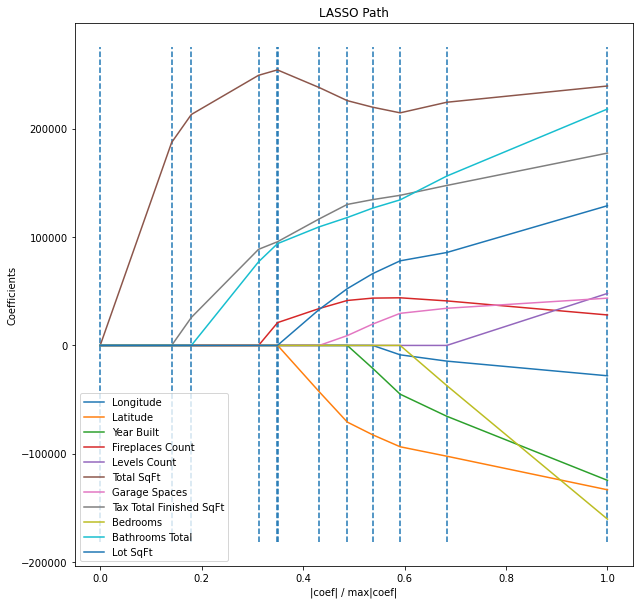

In [32]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_trna.columns)
plt.show()

Return to cleaning to ensure all training data is complete / correct.